# Credit Default Taiwan


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). 
- X12 = amount of bill statement in September, 2005; 
- X13 = amount of bill statement in August, 2005; . . .; 
- X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). 
- X18 = amount paid in September, 2005; 
- X19 = amount paid in August, 2005; . . .;
- X23 = amount paid in April, 2005.

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
orig_df = pd.read_excel(r'UCI - default of credit card clients_DATASET\default of credit card clients.xls')
orig_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [63]:
df = orig_df.copy()
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [64]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

Female    18112
Male      11888
Name: SEX, dtype: int64


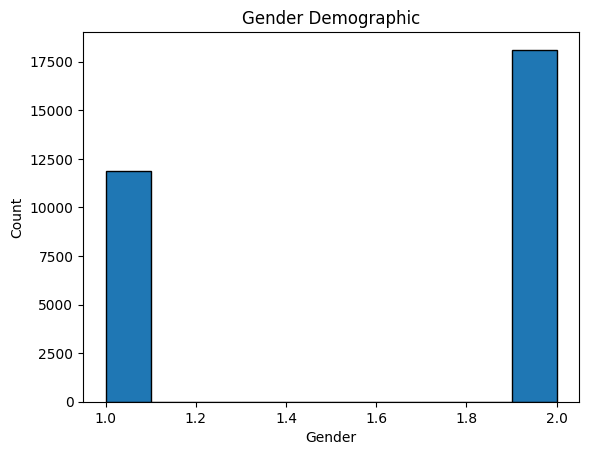

count     30000
unique        2
top           2
freq      18112
Name: SEX, dtype: int64

In [65]:
print(df['SEX'].map({1: 'Male', 2: 'Female'}).value_counts())
sex_hist = plt.hist(df['SEX'], edgecolor= 'black')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Demographic')

plt.show()

df['SEX'].describe() # Gender (1 = male; 2 = female)

university         14030
graduate school    10585
high school         4917
others               123
Name: EDUCATION, dtype: int64


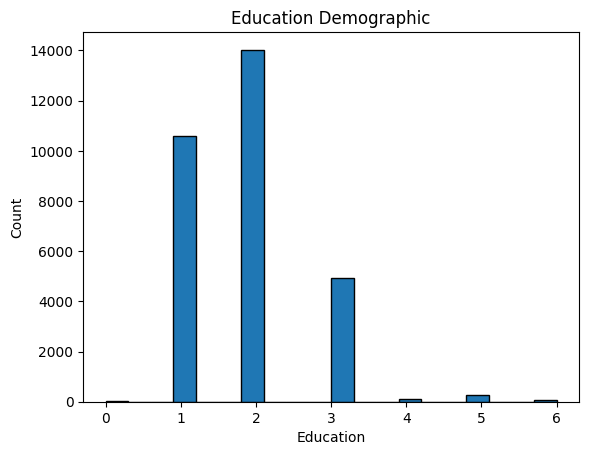

count     30000
unique        7
top           2
freq      14030
Name: EDUCATION, dtype: int64

In [66]:
print(df['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}).value_counts())
educ_hist = plt.hist(df['EDUCATION'], bins= 20, edgecolor= 'black')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Demographic')

plt.show()

df['EDUCATION'].describe() #Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

single     15964
married    13659
others       323
Name: MARRIAGE, dtype: int64


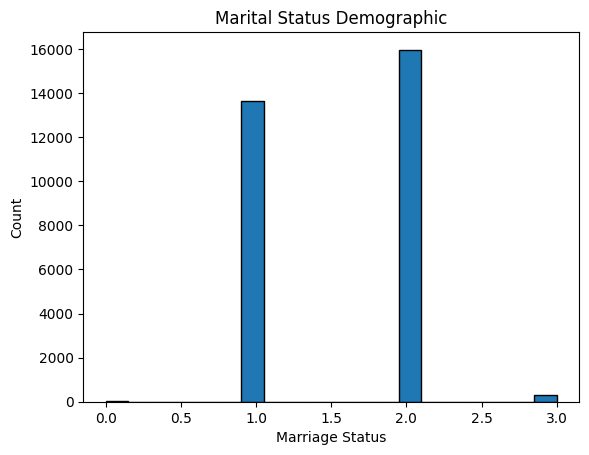

count     30000
unique        4
top           2
freq      15964
Name: MARRIAGE, dtype: int64

In [67]:
print(df['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others'}).value_counts())
marriage_hist = plt.hist(df['MARRIAGE'], bins= 20, edgecolor= 'black')

plt.xlabel('Marriage Status')
plt.ylabel('Count')
plt.title('Marital Status Demographic')

plt.show()

df['MARRIAGE'].describe() # Marital status (1 = married; 2 = single; 3 = others)

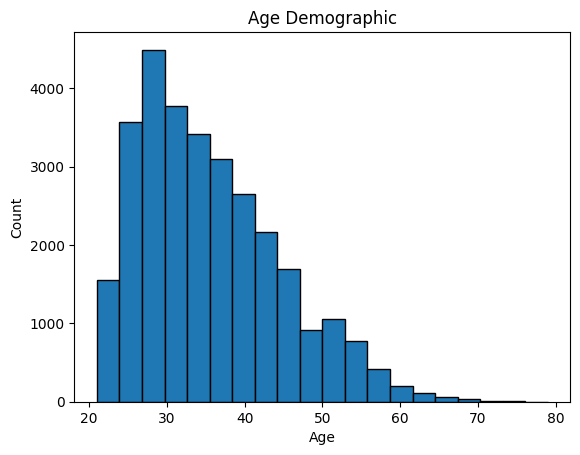

median:   34.0
mode:   29


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [68]:
age_hist = plt.hist(df['AGE'], bins= 20, edgecolor= 'black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Demographic')

plt.show()

print('median:  ',df['AGE'].median())
mode_duration = df['AGE'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['AGE'].astype(float).describe()

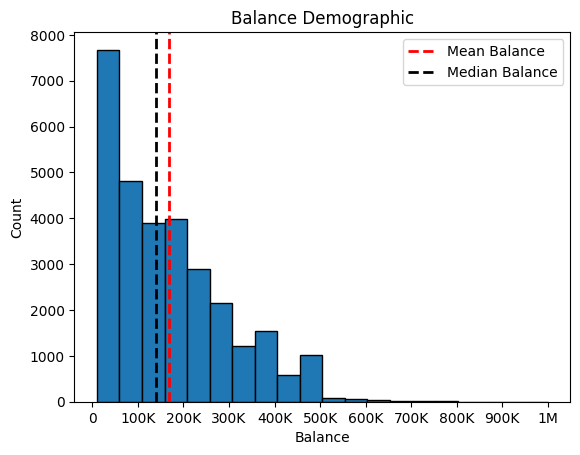

median:   140000.0
mode:   50000


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [69]:
balance_hist = plt.hist(df['LIMIT_BAL'], bins=20, edgecolor='black')

plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance Demographic')
plt.xticks(
    ticks=[0, 1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5, 1e6],
    labels=['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M']
)
# Calculate mean and median age
mean_bal = df['LIMIT_BAL'].mean()
median_bal = df['LIMIT_BAL'].median()

# Add a vertical line for the mean bal
plt.axvline(mean_bal, color='red', linestyle='dashed', linewidth=2, label='Mean Balance')

# Add a vertical line for the median bal
plt.axvline(median_bal, color='black', linestyle='dashed', linewidth=2, label='Median Balance')

plt.legend()
plt.show()

print('median:  ',df['LIMIT_BAL'].median())
mode_duration = df['LIMIT_BAL'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['LIMIT_BAL'].astype(float).describe()

In [70]:
orig_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [71]:
age_limit_bal = df[['AGE','LIMIT_BAL']]
age_limit_bal.head()

,AGE,LIMIT_BAL
0,24,20000
1,26,120000
2,34,90000
3,37,50000
4,57,50000


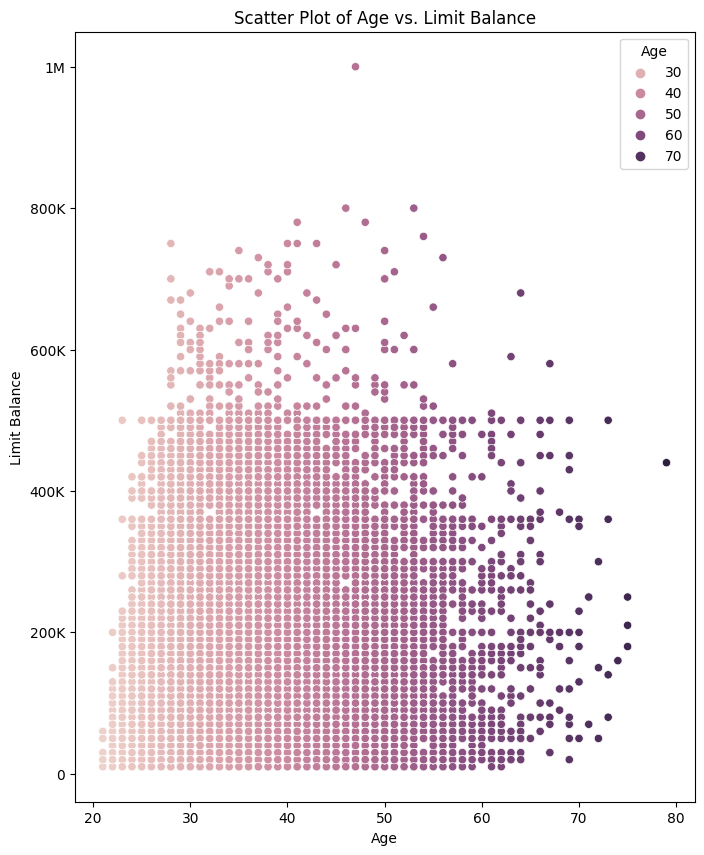

In [72]:

from matplotlib.ticker import FuncFormatter
# Select the columns 'AGE' and 'LIMIT_BAL'
age_limit_bal = df[['AGE', 'LIMIT_BAL']]

# Create a scatter plot with color distinctions for each age group
plt.figure(figsize=(8, 10))  # Optional: Adjust figure size
scatter_plot = sns.scatterplot(data=age_limit_bal, x='AGE', y='LIMIT_BAL', hue='AGE')

# Define a function to format y-axis tick labels as hundreds of thousands or millions
def balance_formatter(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 2e5:
        return f'{x/1e5:.0f}00K'
    else:
        return f'{x:.0f}'

# Apply the balance_formatter to the y-axis ticks
scatter_plot.yaxis.set_major_formatter(FuncFormatter(balance_formatter))

plt.title('Scatter Plot of Age vs. Limit Balance')
plt.xlabel('Age')
plt.ylabel('Limit Balance')

plt.legend(title='Age')
plt.show()

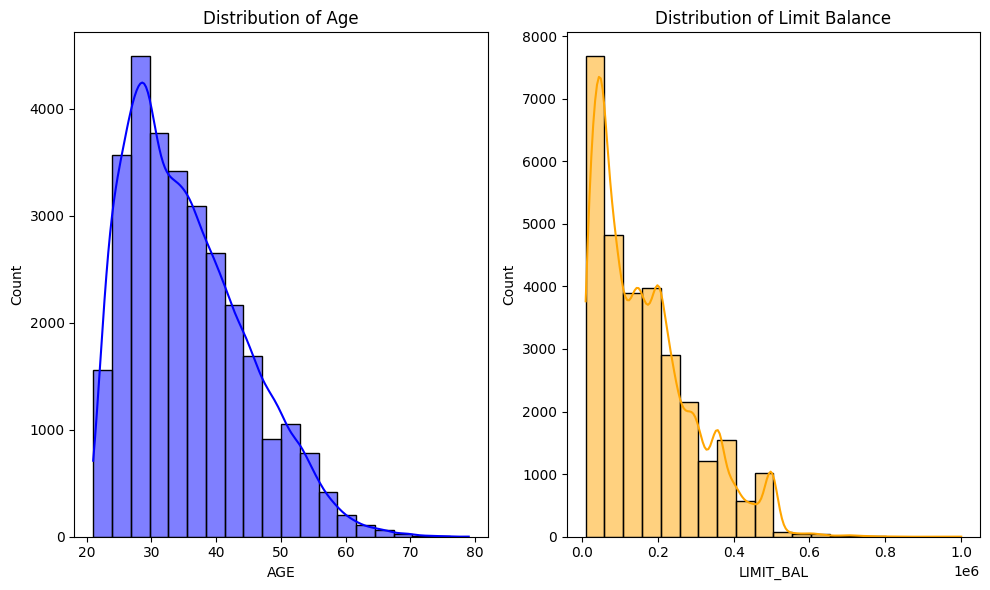

median:   140000.0
mode:   50000
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
median:   34.0
mode:   29
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [73]:

plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

# Create a histogram for 'AGE'
plt.subplot(1, 2, 1)
sns.histplot(data=age_limit_bal, x='AGE', bins=20, kde=True, color='blue')
plt.title('Distribution of Age')

# Create a histogram for 'LIMIT_BAL'
plt.subplot(1, 2, 2)
sns.histplot(data=age_limit_bal, x='LIMIT_BAL', bins=20, kde=True, color='orange')
plt.title('Distribution of Limit Balance')

plt.tight_layout()
plt.show()

print('median:  ',df['LIMIT_BAL'].median())
mode_duration = df['LIMIT_BAL'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
print(df['LIMIT_BAL'].astype(float).describe())

print('median:  ',df['AGE'].median())
mode_duration = df['AGE'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
print(df['AGE'].astype(float).describe())

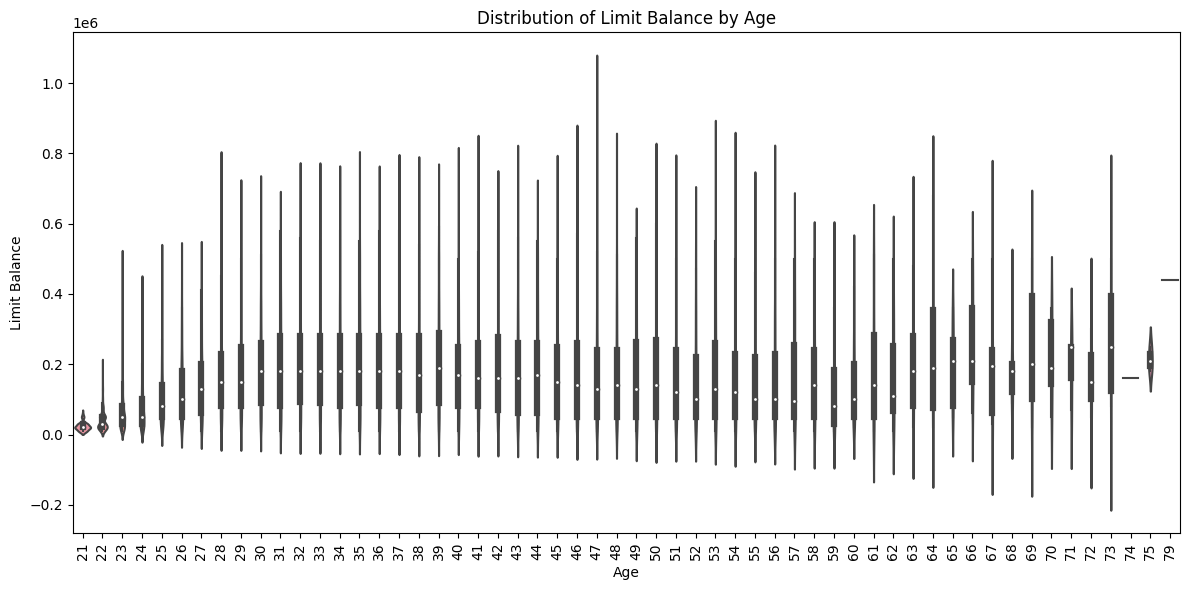

In [74]:
plt.figure(figsize=(12, 6))  # Optional: Adjust figure size

# Create a violin plot for 'LIMIT_BAL' with age groups on the x-axis
sns.violinplot(data=age_limit_bal.astype(int), x='AGE', y='LIMIT_BAL')

plt.title('Distribution of Limit Balance by Age')
plt.xlabel('Age')
plt.ylabel('Limit Balance')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

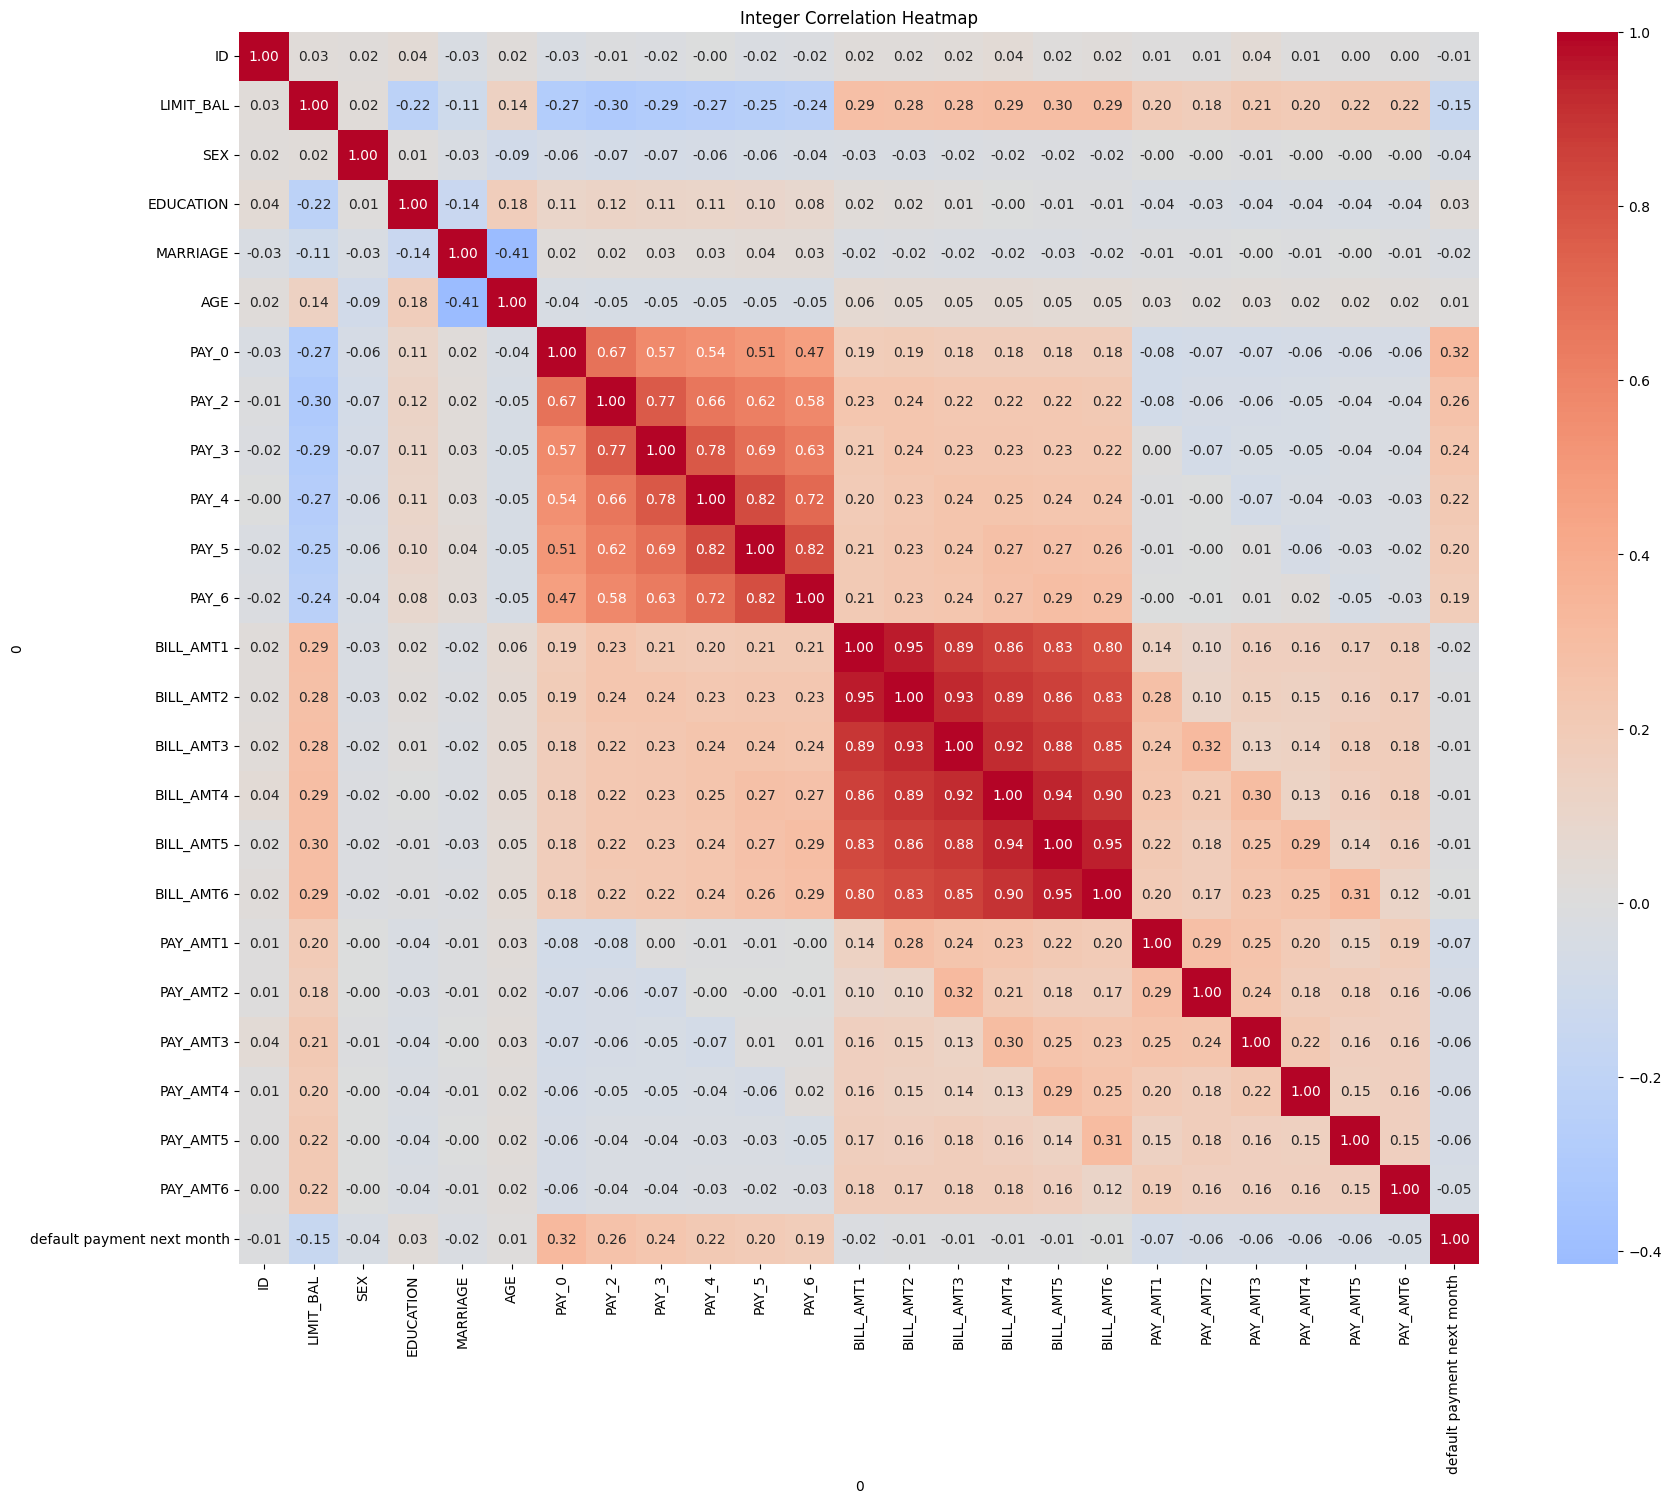

In [75]:
# Convert the entire DataFrame to integer values
df_int = df.astype(int)

plt.figure(figsize=(20, 16))  # Adjust figure size for better readability

# Calculate the correlation matrix and create a heatmap
sns.heatmap(data=df_int.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Integer Correlation Heatmap')
plt.show()

In [76]:
customer_demographic = df[['ID', 'LIMIT_BAL', 'AGE', 'SEX', 'MARRIAGE', 'EDUCATION', 'default payment next month']]

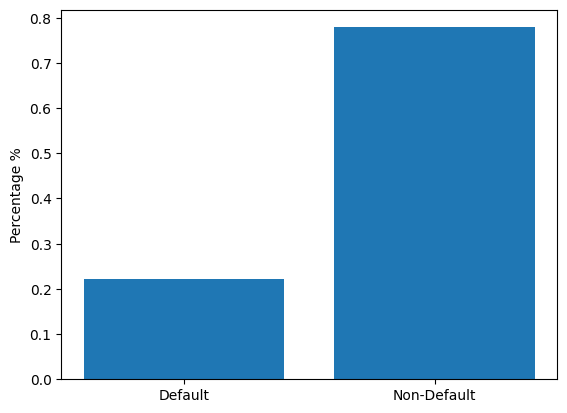

In [77]:
default = len(df['default payment next month'])
pos_default = len(df[df['default payment next month']== 1])
percent_default = len(df[df["default payment next month"]== 1])/len(df["default payment next month"])
percent_non_default = 1- percent_default
label = ["Default", "Non-Default"]
percent = [percent_default, percent_non_default]
plt.bar(label, percent)
plt.ylabel('Percentage %')
plt.show()

In [78]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [79]:
columns_to_exclude = ['ID', 'LIMIT_BAL', 'AGE', 'SEX', 'MARRIAGE', 'EDUCATION', 'default payment next month', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Use the negation operator (~) to select the columns not in the exclusion list
to_pca = df.loc[:, ~df.columns.isin(columns_to_exclude)]
to_pca.shape

(30000, 12)

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(to_pca)

# Apply PCA with desired number of components
n_components = 12
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

print(pca_df.shape)
print(df.shape)

(30000, 12)
(30000, 25)


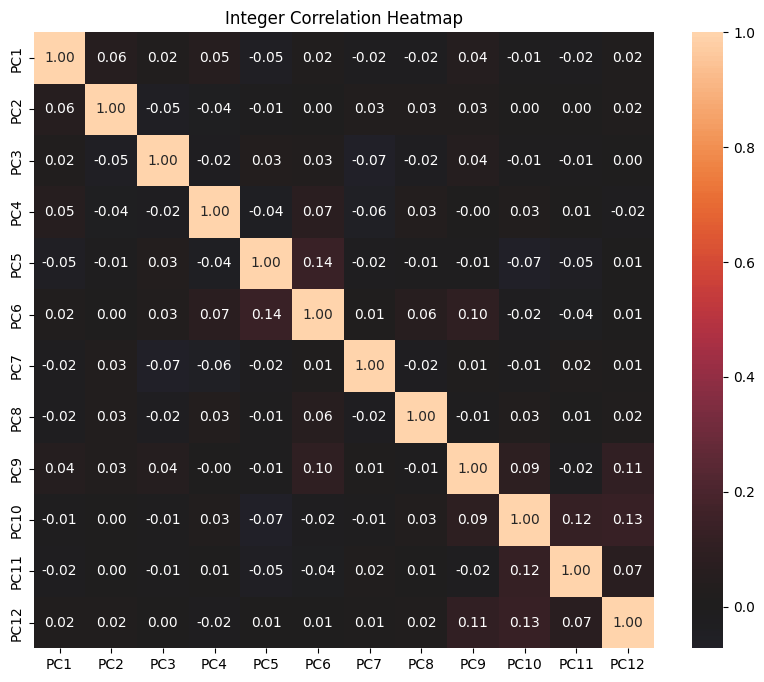

In [81]:
# Convert the entire DataFrame to integer values
df_int = pca_df.astype(int)

plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# Calculate the correlation matrix and create a heatmap
sns.heatmap(data=df_int.corr(), annot=True, fmt=".2f", center=0)

plt.title('Integer Correlation Heatmap')
plt.show()

In [82]:
exclude_df = df[columns_to_exclude]

# Concatenate pca_df and exclude_df horizontally
new_df = pd.concat([exclude_df, pca_df], axis=1)

new_df.head()

,ID,LIMIT_BAL,AGE,SEX,MARRIAGE,EDUCATION,default payment next month,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1,20000,24,2,1,2,1,0,689,0,...,-3.154740,-0.335395,0.531123,-0.240102,0.876024,0.572024,0.149370,-0.029049,-0.077220,-0.059976
1,2,120000,26,2,2,2,1,0,1000,1000,...,0.871128,0.347304,0.743847,-1.950749,0.256807,0.805708,0.256585,-0.040080,-0.010634,-0.074379
2,3,90000,34,2,2,2,0,1518,1500,1000,...,0.182847,-0.001305,-0.028092,-0.078497,0.003352,0.010990,-0.100138,-0.041050,0.086002,0.059449
3,4,50000,37,2,1,2,0,2000,2019,1200,...,0.147701,0.050269,-0.174367,-0.109448,-0.016773,0.016714,0.028006,0.147460,-0.031934,0.032009
4,5,50000,57,1,1,2,0,2000,36681,10000,...,0.888318,0.041123,0.140147,-0.298080,0.663681,0.294839,0.257584,0.135037,0.048948,0.071411


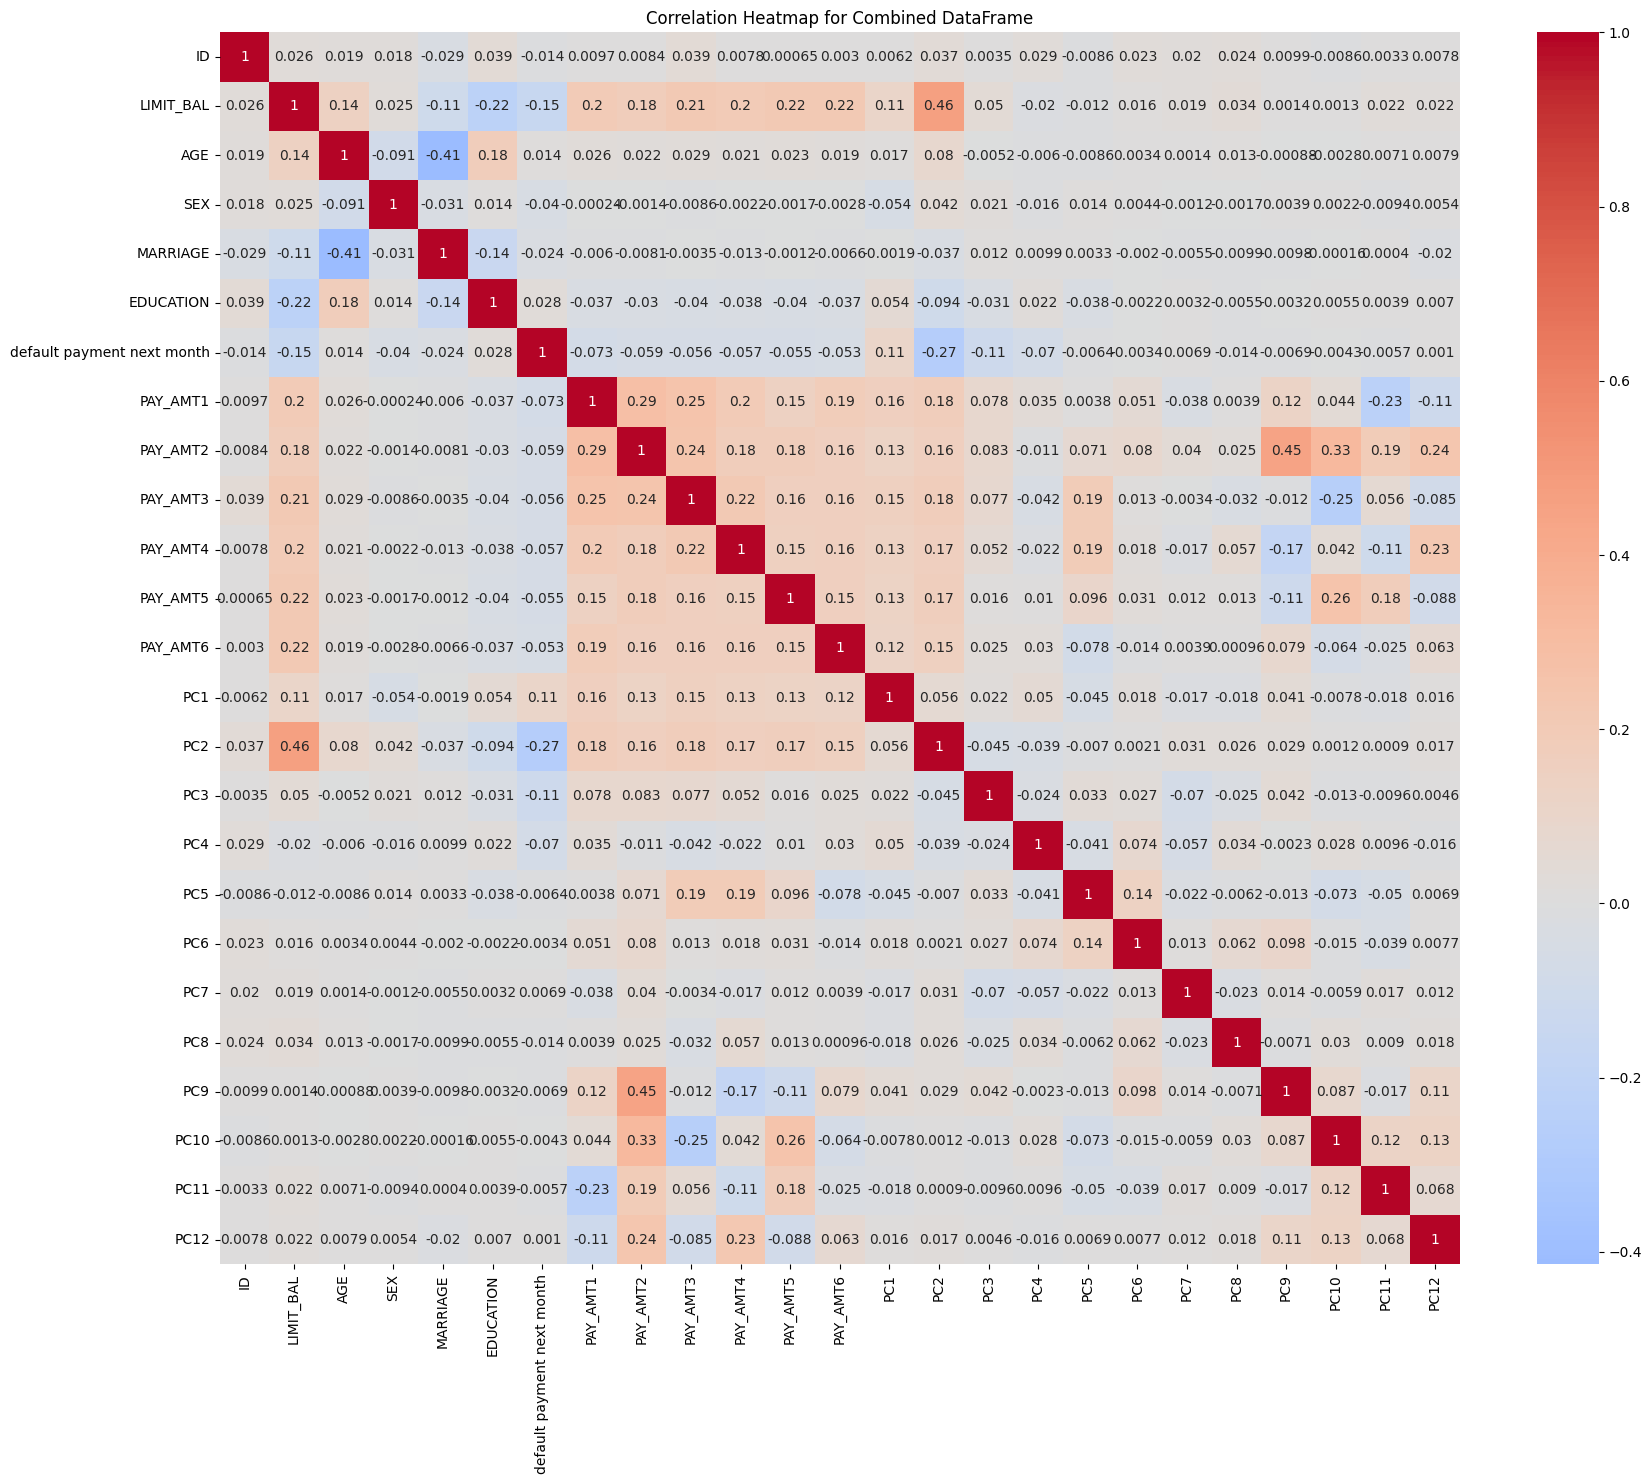

In [83]:
correlation_matrix = new_df.astype(int).corr()

plt.figure(figsize=(20, 16))  

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap for Combined DataFrame')
plt.show()

In [84]:
new_df_shuffled = new_df.sample(frac=1, random_state=42)

In [85]:
X = new_df_shuffled.drop(columns=['default payment next month', 'ID'])
y = new_df_shuffled['default payment next month']

print(X.shape, y.shape)

(30000, 23) (30000,)


In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert X and y to NumPy arrays
X_numpy = np.array(X)
y_numpy = np.array(y)

# Create a label encoder
label_encoder = LabelEncoder()

# Convert y to numeric labels
y_encoded = label_encoder.fit_transform(y_numpy)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_numpy, y_encoded, test_size=0.3, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

In [88]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(21000, 23) (21000,) (4500, 23) (4500,)


In [89]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
# Create a label encoder
label_encoder = LabelEncoder()

# Convert y_train to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and apply an undersampler
under_sampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train_encoded)


In [90]:
print("Shape of X_train:", X_train_resampled.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train_resampled.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (9290, 23)
Shape of X_val: (4500, 23)
Shape of X_test: (4500, 23)
Shape of y_train: (9290,)
Shape of y_val: (4500,)
Shape of y_test: (4500,)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [92]:
logReg = LogisticRegression()
logReg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [93]:
print(classification_report(y_val, logReg.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.52      0.64      3505
           1       0.29      0.70      0.41       995

    accuracy                           0.56      4500
   macro avg       0.58      0.61      0.53      4500
weighted avg       0.73      0.56      0.59      4500



In [94]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(logReg, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Scores: [0.58730159 0.58289703 0.62103175 0.58589512 0.58348624 0.59322034
 0.59132007 0.5973535  0.58614232 0.59259259]
Mean CV Score: 0.5921240545735157
Std CV Score: 0.010595547228897759


In [95]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42) 
RF_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

In [96]:
print(classification_report(y_val, RF_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3505
           1       0.42      0.66      0.52       995

    accuracy                           0.73      4500
   macro avg       0.65      0.70      0.66      4500
weighted avg       0.78      0.73      0.74      4500



In [97]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(RF_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.71428571 0.73979592 0.74271845 0.73067916 0.73214286 0.75376884
 0.75240385 0.75802469 0.7638191  0.7060241 ]
Mean CV Score: 0.739366266690243
Std CV Score: 0.01789773736172648


In [130]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.01)
GB_model = GB_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, GB_model.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      3505
         1.0       0.48      0.61      0.54       995

    accuracy                           0.77      4500
   macro avg       0.68      0.71      0.69      4500
weighted avg       0.79      0.77      0.78      4500



In [131]:
from sklearn.svm import SVC

SVM_model = SVC(class_weight='balanced')
SVM_model = SVM_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, SVM_model.predict(X_val)))


              precision    recall  f1-score   support

         0.0       0.84      0.59      0.69      3505
         1.0       0.30      0.62      0.40       995

    accuracy                           0.59      4500
   macro avg       0.57      0.60      0.55      4500
weighted avg       0.72      0.59      0.63      4500



In [132]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, KNN_model.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69      3505
         1.0       0.28      0.54      0.37       995

    accuracy                           0.59      4500
   macro avg       0.55      0.57      0.53      4500
weighted avg       0.70      0.59      0.62      4500



In [134]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model = NB_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_val, NB_model.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.90      0.15      0.25      3505
         1.0       0.24      0.94      0.38       995

    accuracy                           0.32      4500
   macro avg       0.57      0.55      0.32      4500
weighted avg       0.76      0.32      0.28      4500



In [98]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier()
NN_model = NN_model.fit(X_train_resampled, y_train_resampled)

In [99]:
print(classification_report(y_val, NN_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      3505
           1       0.49      0.09      0.15       995

    accuracy                           0.78      4500
   macro avg       0.64      0.53      0.51      4500
weighted avg       0.72      0.78      0.71      4500



In [100]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(NN_model, X_train_resampled, y_train_resampled, cv=10, scoring='precision')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Std CV Score:", std_cv_score)

Cross-Validation Scores: [0.51059086 0.78082192 0.53004005 0.72519084 0.73584906 0.7578125
 0.675      0.52375    0.55973813 0.50859107]
Mean CV Score: 0.630738442542645
Std CV Score: 0.10797435230094904


In [101]:
import tensorflow as tf

In [118]:
# Convert data types to a compatible type (e.g., float32)
X_train_resampled = X_train_resampled.astype(np.float)
y_train_resampled = y_train_resampled.astype(np.float)
X_val = X_val.astype(np.float)
y_val = y_val.astype(np.float)




C:\Users\enzo\AppData\Local\Temp\ipykernel_11952\3850580781.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_resampled = X_train_resampled.astype(np.float)
C:\Users\enzo\AppData\Local\Temp\ipykernel_11952\3850580781.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train_resampled = y_train_resampled.astype(np.float)
C:\Use

In [119]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.legend()
  plt.show()

In [120]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train_resampled.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [121]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                768       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1985 (7.75 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 64 (256.00 Byte)
___________________

In [123]:
# Train the model
epochs = 100  
history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
291/291 [==============================] - 1s 2ms/step - loss: 0.7131 - accuracy: 0.5459 - val_loss: 0.6431 - val_accuracy: 0.6196
Epoch 2/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5771 - val_loss: 0.6803 - val_accuracy: 0.5167
Epoch 3/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5804 - val_loss: 0.6935 - val_accuracy: 0.5029
Epoch 4/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5889 - val_loss: 0.6906 - val_accuracy: 0.5338
Epoch 5/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5904 - val_loss: 0.6532 - val_accuracy: 0.5727
Epoch 6/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.5887 - val_loss: 0.6575 - val_accuracy: 0.5824
Epoch 7/100
291/291 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.5916 - val_loss: 0.7083 - val_accuracy: 0.4331

In [124]:
# evaluate model
model.evaluate(X_val, y_val)

141/141 [==============================] - 0s 661us/step - loss: 0.6917 - accuracy: 0.4856


[0.6917152404785156, 0.4855555593967438]

In [125]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_val, y_pred))

141/141 [==============================] - 0s 584us/step
              precision    recall  f1-score   support

         0.0       0.88      0.40      0.54      3505
         1.0       0.27      0.80      0.41       995

    accuracy                           0.49      4500
   macro avg       0.57      0.60      0.48      4500
weighted avg       0.74      0.49      0.51      4500



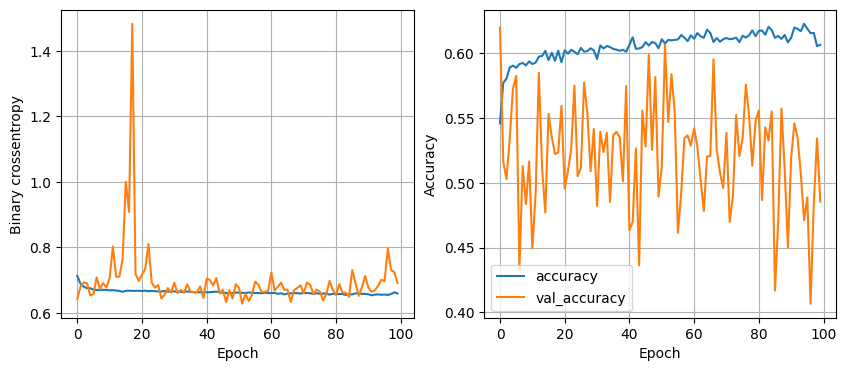

In [126]:
plot_history(history)